In [2]:
import yfinance as yf
import mplfinance as mpf
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
today = pd.Timestamp(datetime.datetime.now())
print(f"Today is {today}")
#d = today.strftime('%m-%d-%y')
#print(f'date= {d}')


Today is 2023-03-11 23:45:37.967840


In [3]:
def convert_scale(value):
    if value.endswith('M'):
        return float(value[:-1]) * 10**6
    elif value.endswith('B'):
        return float(value[:-1]) * 10**9
    elif value.endswith('T'):
        return float(value[:-1]) * 10**12
    else:
        return float(value)



In [4]:
# reading in from a website
most_active = pd.read_html('https://finance.yahoo.com/most-active')[0]
most_active['PE Ratio (TTM)'] = most_active['PE Ratio (TTM)'].fillna(0)
most_active.dropna(axis=1, thresh=9, inplace=True)
#most_active.set_index('Symbol',inplace=True)
#most_active['Volume', 'Avg Vol (3 month)', 'Market Cap'] = most_active['Volume', 'Avg Vol (3 month)', 'Market Cap'].apply(convert_scale)
most_active.head()
#most_active.info()
#most_active.shape
# dataset has columns that have NaN values
most_active['Volume'] = most_active['Volume'].apply(convert_scale)
most_active['Avg Vol (3 month)'] = most_active['Avg Vol (3 month)'].apply(convert_scale)
most_active['Market Cap'] = most_active['Market Cap'].apply(convert_scale)

most_active.head()
#most_active.info()

,Symbol,Name,Price (Intraday),Change,% Change,Volume,Avg Vol (3 month),Market Cap,PE Ratio (TTM)
0,TSLA,"Tesla, Inc.",173.44,0.52,+0.30%,191489000.0,183541000.0,5.487820e+11,50.27
1,BAC,Bank of America Corporation,30.27,-0.27,-0.88%,164380000.0,40376000.0,2.421380e+11,9.58
2,SCHW,The Charles Schwab Corporation,58.70,-7.77,-11.69%,88451000.0,9863000.0,1.073580e+11,19.00
3,SOFI,"SoFi Technologies, Inc.",5.58,-0.51,-8.37%,86810000.0,38149000.0,4.462000e+09,0.00
4,F,Ford Motor Company,12.10,-0.35,-2.81%,72997000.0,63500000.0,4.823300e+10,0.00


array([<AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >,
       <AxesSubplot: >, <AxesSubplot: >], dtype=object)

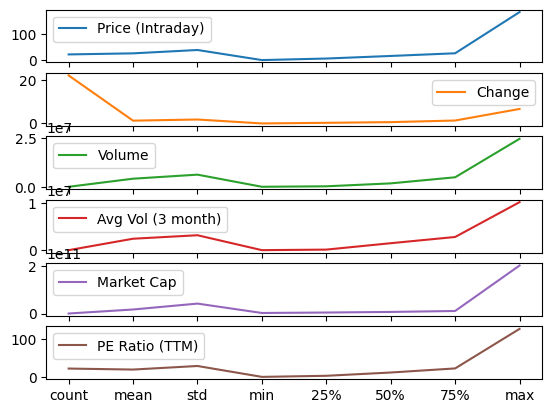

In [5]:
gainers = pd.read_html('https://finance.yahoo.com/gainers')[0]
gainers['PE Ratio (TTM)'] = gainers['PE Ratio (TTM)'].fillna(0)
gainers.dropna(axis=1, thresh=9, inplace=True)
#gainers.set_index('Symbol', inplace=True)
gainers.head()
#gainers.info()
gainers.dtypes
gainers['Volume'] = gainers['Volume'].apply(convert_scale)
gainers['Avg Vol (3 month)'] = gainers['Avg Vol (3 month)'].apply(convert_scale)
gainers['Market Cap'] = gainers['Market Cap'].apply(convert_scale)
gainers.dtypes
gainers.describe().plot(subplots=True)

In [6]:
losers = pd.read_html('https://finance.yahoo.com/losers')[0]
losers['PE Ratio (TTM)'] = losers['PE Ratio (TTM)'].fillna(0)
losers.dropna(axis=1, thresh=9, inplace=True)
#losers.set_index('Symbol',inplace=True)
losers.head()
#losers.info()
losers['Volume'] = losers['Volume'].apply(convert_scale)
losers['Avg Vol (3 month)'] = losers['Avg Vol (3 month)'].apply(convert_scale)
losers['Market Cap'] = losers['Market Cap'].apply(convert_scale)

In [7]:
concat = pd.concat([most_active, gainers, losers])
print(concat.shape)
concat.head()

#concat.info()

(72, 9)


,Symbol,Name,Price (Intraday),Change,% Change,Volume,Avg Vol (3 month),Market Cap,PE Ratio (TTM)
0,TSLA,"Tesla, Inc.",173.44,0.52,+0.30%,191489000.0,183541000.0,5.487820e+11,50.27
1,BAC,Bank of America Corporation,30.27,-0.27,-0.88%,164380000.0,40376000.0,2.421380e+11,9.58
2,SCHW,The Charles Schwab Corporation,58.70,-7.77,-11.69%,88451000.0,9863000.0,1.073580e+11,19.00
3,SOFI,"SoFi Technologies, Inc.",5.58,-0.51,-8.37%,86810000.0,38149000.0,4.462000e+09,0.00
4,F,Ford Motor Company,12.10,-0.35,-2.81%,72997000.0,63500000.0,4.823300e+10,0.00


In [8]:
# find if there are any duplicated rows
duplicate = concat[concat.duplicated()]
duplicate

,Symbol,Name,Price (Intraday),Change,% Change,Volume,Avg Vol (3 month),Market Cap,PE Ratio (TTM)
7,FRC,First Republic Bank,81.76,-14.25,-14.84%,51162000.0,2593000.0,1.522500e+10,11.65
11,SCHW,The Charles Schwab Corporation,58.70,-7.77,-11.69%,88451000.0,9863000.0,1.073580e+11,19.00


In [9]:
concat.drop_duplicates(keep='first', inplace=True)
concat.shape

(70, 9)

In [10]:
concat.dtypes

Symbol                object
Name                  object
Price (Intraday)     float64
Change               float64
% Change              object
Volume               float64
Avg Vol (3 month)    float64
Market Cap           float64
PE Ratio (TTM)       float64
dtype: object

In [20]:

concat.describe()

,Price (Intraday),Change,Volume,Avg Vol (3 month),Market Cap,PE Ratio (TTM)
count,70.000000,70.000000,7.000000e+01,7.000000e+01,7.000000e+01,70.000000
mean,40.961419,-2.188447,2.669110e+07,1.613129e+07,1.064380e+11,18.097429
std,50.249474,5.115784,3.555649e+07,2.779111e+07,3.384799e+11,32.119244
min,0.009300,-20.760000,1.548000e+04,1.291000e+03,2.061000e+09,0.000000
25%,9.210000,-2.910000,2.691000e+06,1.140750e+06,4.415500e+09,0.000000
50%,19.965000,-0.360000,1.124300e+07,3.686500e+06,8.215500e+09,7.650000
75%,49.602500,0.327500,4.200650e+07,2.108925e+07,1.911275e+10,18.832500
max,229.650000,6.640000,1.914890e+08,1.835410e+08,2.350000e+12,156.070000


In [12]:
volume_change = concat.query('Volume >= 20000000 and Change <= -5')
volume_change

,Symbol,Name,Price (Intraday),Change,% Change,Volume,Avg Vol (3 month),Market Cap,PE Ratio (TTM)
2,SCHW,The Charles Schwab Corporation,58.70,-7.77,-11.69%,88451000.0,9863000.0,1.073580e+11,19.00
10,FRC,First Republic Bank,81.76,-14.25,-14.84%,51162000.0,2593000.0,1.522500e+10,11.65
0,SBNY,Signature Bank,70.00,-20.76,-22.87%,21708000.0,1717000.0,4.408000e+09,4.37
1,DOCU,"DocuSign, Inc.",49.69,-14.72,-22.85%,29048000.0,5193000.0,9.991000e+09,0.00
2,WAL,Western Alliance Bancorporation,49.34,-13.02,-20.88%,24590000.0,1383000.0,5.408000e+09,7.38


In [28]:

Symbol_s = concat.loc[(concat['PE Ratio (TTM)']>=19) & (concat['Change']<= -5) & (concat['Symbol'].str.startswith('S')),['Symbol', 'Name']]
Symbol_s

,Symbol,Name
2,SCHW,The Charles Schwab Corporation


In order to filter a DataFrame column that has spaces with the query method, we wrap the column using backticks. While this may not look great, it does allow us to use any column in the method.

In [13]:
largest_market_cap = concat.query("`Market Cap` > 200000000000")
print(largest_market_cap)
largest_market_cap.Symbol

   Symbol                         Name  Price (Intraday)  Change % Change  \
0    TSLA                  Tesla, Inc.          173.4400  0.5200   +0.30%   
1     BAC  Bank of America Corporation           30.2700 -0.2700   -0.88%   
6    AMZN             Amazon.com, Inc.           90.7300 -1.5200   -1.65%   
7    AAPL                   Apple Inc.          148.5000 -2.0900   -1.39%   
11   NVDA           NVIDIA Corporation          229.6500 -4.7100   -2.01%   
19    JPM         JPMorgan Chase & Co.          133.6500  3.3100   +2.54%   
22  GOOGL                Alphabet Inc.           90.6300 -1.6900   -1.83%   
3   RLLCF     Rolls-Royce Holdings plc            0.0093  0.0007   +8.14%   

         Volume  Avg Vol (3 month)    Market Cap  PE Ratio (TTM)  
0   191489000.0        183541000.0  5.487820e+11           50.27  
1   164380000.0         40376000.0  2.421380e+11            9.58  
6    69827000.0         71898000.0  9.297380e+11            0.00  
7    68572000.0         72827000.0  2.

0      TSLA
1       BAC
6      AMZN
7      AAPL
11     NVDA
19      JPM
22    GOOGL
3     RLLCF
Name: Symbol, dtype: object

In [14]:
large_cap = (largest_market_cap.Symbol).to_list()
large_cap

['TSLA', 'BAC', 'AMZN', 'AAPL', 'NVDA', 'JPM', 'GOOGL', 'RLLCF']

In [15]:
ticker = yf.download(large_cap, period='3y',interval='1d', ignore_tz=True)
ticker.info()
ticker.head()
#ticker.to_csv('ticker.csv')

[*********************100%***********************]  8 of 8 completed
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 756 entries, 2020-03-11 to 2023-03-10
Data columns (total 48 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   (Adj Close, AAPL)   756 non-null    float64
 1   (Adj Close, AMZN)   756 non-null    float64
 2   (Adj Close, BAC)    756 non-null    float64
 3   (Adj Close, GOOGL)  756 non-null    float64
 4   (Adj Close, JPM)    756 non-null    float64
 5   (Adj Close, NVDA)   756 non-null    float64
 6   (Adj Close, RLLCF)  756 non-null    float64
 7   (Adj Close, TSLA)   756 non-null    float64
 8   (Close, AAPL)       756 non-null    float64
 9   (Close, AMZN)       756 non-null    float64
 10  (Close, BAC)        756 non-null    float64
 11  (Close, GOOGL)      756 non-null    float64
 12  (Close, JPM)        756 non-null    float64
 13  (Close, NVDA)       756 non-null    float64
 14  (Close, RLLCF)    

Adj Close                                                         \
                 AAPL       AMZN        BAC      GOOGL        JPM       NVDA   
Date                                                                           
2020-03-11  67.515152  91.042999  21.165810  60.544998  87.481117  61.431183   
2020-03-12  60.847717  83.830498  19.149132  55.577499  80.270035  53.913990   
2020-03-13  68.137779  89.250000  22.556944  60.713501  94.728661  60.027946   
2020-03-16  59.372059  84.457497  19.083771  53.650002  80.552650  48.951534   
2020-03-17  61.982651  90.391998  20.521591  55.903000  85.475517  54.153259   

                                   Close             ...    Open             \
             RLLCF       TSLA       AAPL       AMZN  ...   RLLCF       TSLA   
Date                                                 ...                      
2020-03-11  0.0045  42.282001  68.857498  91.042999  ...  0.0049  42.680000   
2020-03-12  0.0040  37.369999  62.057499  83.830498  ...  0.0053  38.726002   
2020-03-13  0.0046  36.441334  69.492500  89.250000  ...  0.0041  39.666668   
2020-03-16  0.0046  29.671333  60.552502  84.457497  ...  0.0045  31.299999   
2020-03-17  0.0043  28.680000  63.215000  90.391998  ...  0.0037  29.334000   

               Volume                                                      \
                 AAPL       AMZN        BAC     GOOGL       JPM      NVDA   
Date                                                                        
2020-03-11  255598800  112496000  127347000  54732000  38127000  49996400   
2020-03-12  418474000  226924000  139552600  94326000  49725200  81654000   
2020-03-13  370732000  176194000  128357400  79400000  38543300  63483600   
2020-03-16  322423600  178346000  121688800  96520000  38589700  72697200   
2020-03-17  324056000  218342000  120065700  83194000  35239800  83363200   

                                
              RLLCF       TSLA  
Date                            
2020-03-11   887600  199837500  
2020-03-12  3394400  283636500  
2020-03-13  1867300  339604500  
2020-03-16  1430400  307342500  
2020-03-17  5241700  359919000  

[5 rows x 48 columns]

In [ ]:
high_close = ticker[ticker[('Close', 'AAPL')] >= ticker[('High', 'AMZN')]]
high_close


Adj Close                                                 \
                  AAPL        AMZN        BAC       GOOGL         JPM   
Date                                                                    
2021-12-10  178.142532  172.212006  43.226620  148.001495  153.793915   
2021-12-13  174.459564  169.567505  42.313927  145.826508  151.965561   
2021-12-14  173.059845  169.091507  42.847950  143.906998  153.129944   
2021-12-15  177.993637  173.315002  42.663467  146.440994  151.984802   
2021-12-17  169.893066  170.017502  42.605209  141.725006  150.849289   
...                ...         ...        ...         ...         ...   
2023-03-06  153.830002   93.750000  34.090000   95.129997  142.820007   
2023-03-07  151.600006   93.550003  33.000000   93.860001  138.619995   
2023-03-08  152.869995   93.919998  32.560001   94.250000  137.800003   
2023-03-09  150.589996   92.250000  30.540001   92.320000  130.339996   
2023-03-10  148.500000   90.730003  30.270000   90.629997  133.649994   

                                                 Close              ...  \
                  NVDA   RLLCF        TSLA        AAPL        AMZN  ...   
Date                                                                ...   
2021-12-10  301.646667  0.0135  339.010010  179.449997  172.212006  ...   
2021-12-13  281.299133  0.0131  322.136658  175.740005  169.567505  ...   
2021-12-14  283.057190  0.0132  319.503326  174.330002  169.091507  ...   
2021-12-15  304.253784  0.0133  325.329987  179.300003  173.315002  ...   
2021-12-17  277.703125  0.0132  310.856659  171.139999  170.017502  ...   
...                ...     ...         ...         ...         ...  ...   
2023-03-06  235.500000  0.0076  193.809998  153.830002   93.750000  ...   
2023-03-07  232.880005  0.0072  187.710007  151.600006   93.550003  ...   
2023-03-08  241.809998  0.0087  182.000000  152.869995   93.919998  ...   
2023-03-09  234.360001  0.0086  172.919998  150.589996   92.250000  ...   
2023-03-10  229.649994  0.0093  173.440002  148.500000   90.730003  ...   

              Open                 Volume                                 \
             RLLCF        TSLA       AAPL      AMZN        BAC     GOOGL   
Date                                                                       
2021-12-10  0.0140  336.250000  115402700  60690000   37700200  24458000   
2021-12-13  0.0137  333.696655  153237000  62170000   38653900  27070000   
2021-12-14  0.0134  315.000000  139380400  55976000   47099400  38446000   
2021-12-15  0.0135  317.736664  131063300  75794000   60057100  36370000   
2021-12-17  0.0125  304.923340  195432700  85542000  124242400  50416000   
...            ...         ...        ...       ...        ...       ...   
2023-03-06  0.0099  198.539993   87558000  52112400   36646700  32639300   
2023-03-07  0.0077  191.380005   56182000  49100700   52855300  27835500   
2023-03-08  0.0080  185.039993   47204800  44899100   40045600  34103300   
2023-03-09  0.0085  180.250000   53833600  56218700  112457900  28813500   
2023-03-10  0.0089  175.130005   68524400  69747500  165195300  35927000   

                                                    
                 JPM      NVDA    RLLCF       TSLA  
Date                                                
2021-12-10  10405400  48882500  2255600   59664300  
2021-12-13  12069000  59834400   382200   78595500  
2021-12-14  12563600  66703500  1344300   70806300  
2021-12-15  14014200  69829700   945700   75169200  
2021-12-17  28082000  71375800  5210300  100437300  
...              ...       ...      ...        ...  
2023-03-06   9261300  43742900  7267900  128100100  
2023-03-07  11747600  51515400   952000  148125800  
2023-03-08  10002500  51357300  2249500  151897800  
2023-03-09  25888100  50125700  1894400  170023800  
2023-03-10  37576700  47453200  1583100  191007900  

[312 rows x 48 columns]

In [30]:
close = ticker.Close
close.info()
close.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 756 entries, 2020-03-11 to 2023-03-10
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    756 non-null    float64
 1   AMZN    756 non-null    float64
 2   BAC     756 non-null    float64
 3   GOOGL   756 non-null    float64
 4   JPM     756 non-null    float64
 5   NVDA    756 non-null    float64
 6   RLLCF   756 non-null    float64
 7   TSLA    756 non-null    float64
dtypes: float64(8)
memory usage: 53.2 KB


,AAPL,AMZN,BAC,GOOGL,JPM,NVDA,RLLCF,TSLA
Date,,,,,,,,
2020-03-11,68.857498,91.042999,22.670000,60.544998,95.959999,61.617500,0.0045,42.282001
2020-03-12,62.057499,83.830498,20.510000,55.577499,88.050003,54.077499,0.0040,37.369999
2020-03-13,69.492500,89.250000,24.160000,60.713501,103.910004,60.209999,0.0046,36.441334
2020-03-16,60.552502,84.457497,20.440001,53.650002,88.360001,49.099998,0.0046,29.671333
2020-03-17,63.215000,90.391998,21.980000,55.903000,93.760002,54.317501,0.0043,28.680000


In [32]:
fig = px.line(close, title="Closing price data for Market Cap > 200000000000 for last 3y") 
fig.show()

In [43]:
volume = ticker.Volume
volume

print(volume.describe())
figure = px.line(volume)
figure.show()

               AAPL          AMZN           BAC         GOOGL           JPM  \
count  7.560000e+02  7.560000e+02  7.560000e+02  7.560000e+02  7.560000e+02   
mean   1.060379e+08  7.939418e+07  5.301154e+07  3.505360e+07  1.500417e+07   
std    5.200290e+07  3.384067e+07  2.254107e+07  1.556935e+07  7.256930e+06   
min    3.519590e+07  2.903800e+07  1.611850e+07  9.312000e+06  3.220500e+06   
25%    7.368718e+07  5.643655e+07  3.895542e+07  2.514800e+07  1.038128e+07   
50%    9.054130e+07  6.950800e+07  4.775535e+07  3.139100e+07  1.302410e+07   
75%    1.212974e+08  9.271100e+07  5.997700e+07  4.005825e+07  1.705588e+07   
max    4.184740e+08  2.726620e+08  1.818985e+08  1.232000e+08  5.441880e+07   

               NVDA         RLLCF          TSLA  
count  7.560000e+02  7.560000e+02  7.560000e+02  
mean   4.626787e+07  7.210735e+06  1.237252e+08  
std    1.899726e+07  2.789686e+07  8.069390e+07  
min    9.788400e+06  2.450000e+04  2.940180e+07  
25%    3.175920e+07  1.025575e+06  6.8

TypeError: line() got an unexpected keyword argument 'subplot'

array([<AxesSubplot: xlabel='Date'>, <AxesSubplot: xlabel='Date'>,
       <AxesSubplot: xlabel='Date'>, <AxesSubplot: xlabel='Date'>,
       <AxesSubplot: xlabel='Date'>, <AxesSubplot: xlabel='Date'>,
       <AxesSubplot: xlabel='Date'>, <AxesSubplot: xlabel='Date'>],
      dtype=object)

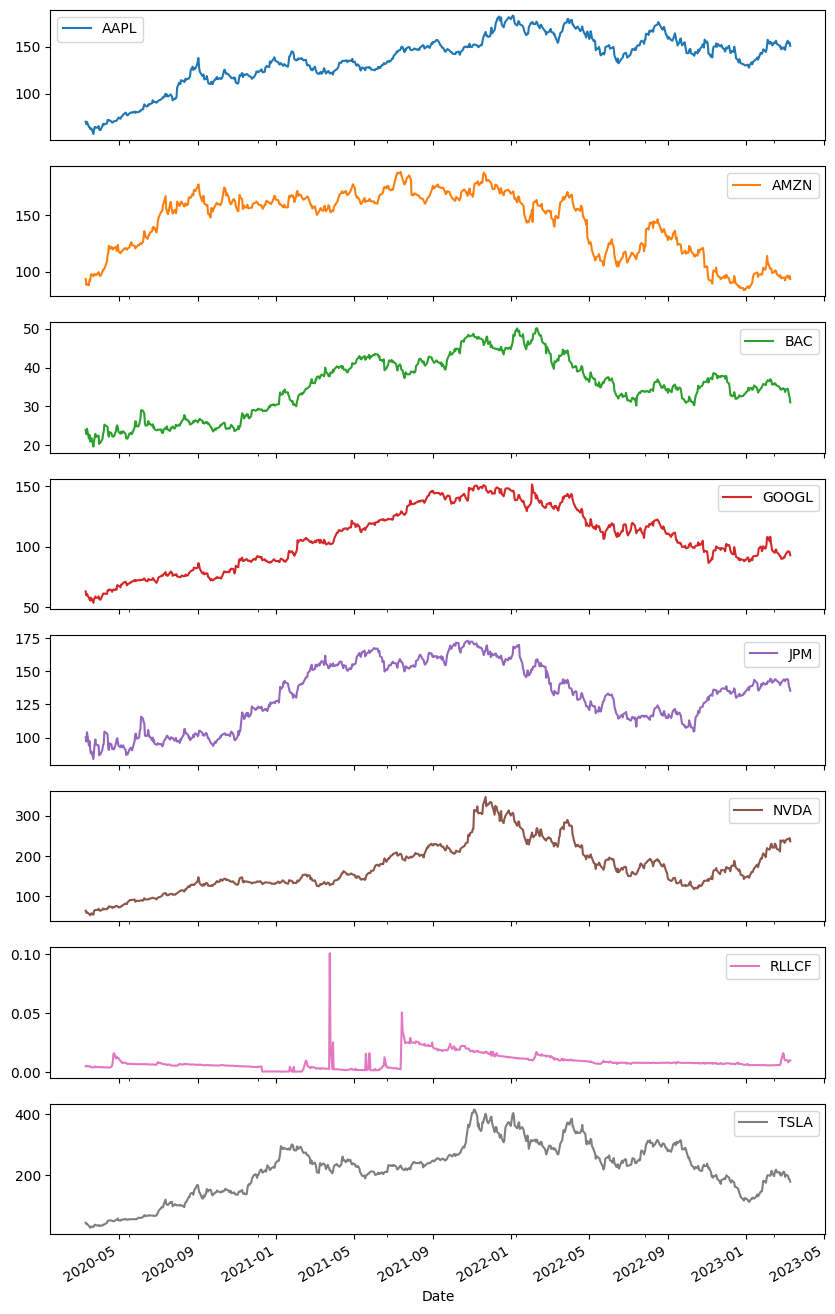

In [ ]:
high = ticker.High
high.plot(subplots=True, figsize=(10,18))

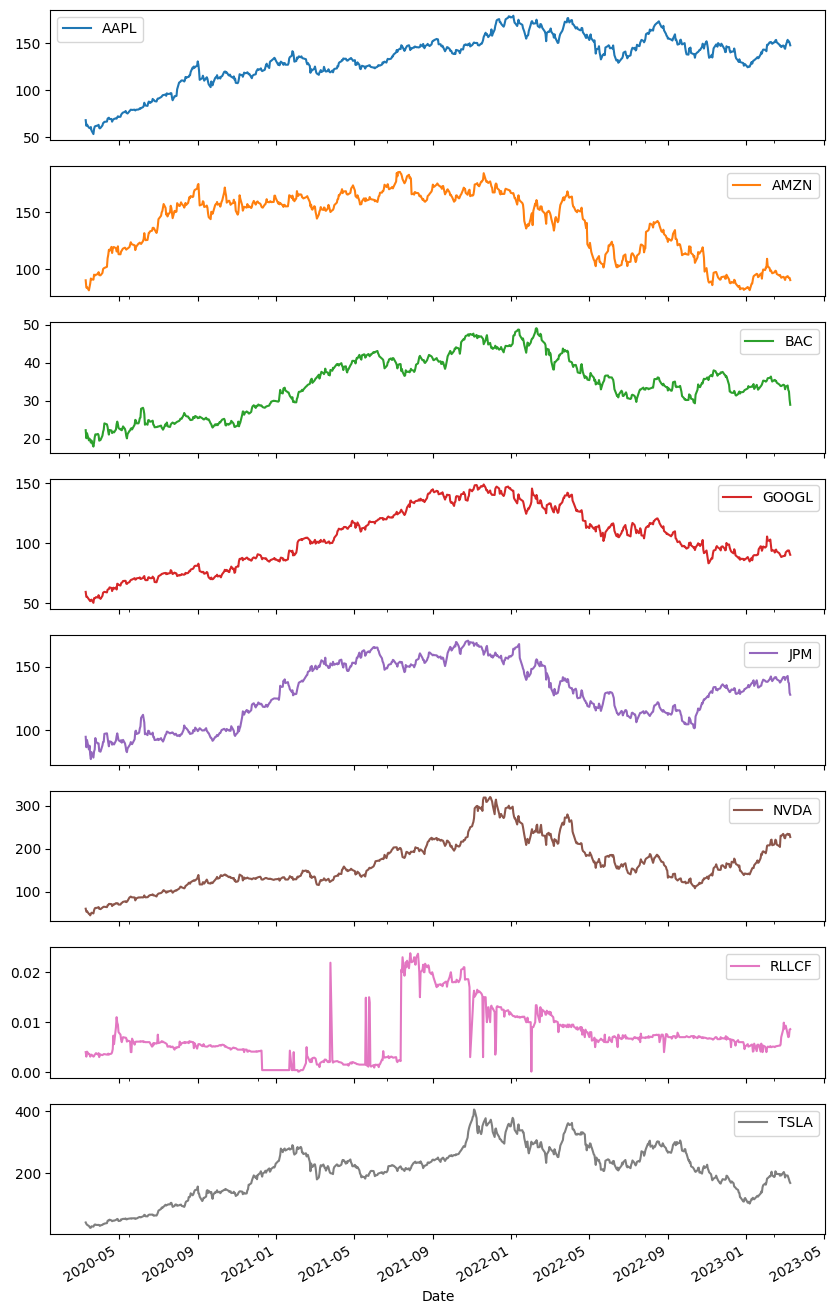

In [ ]:
lows = ticker.Low.plot(subplots=True, figsize=(10, 18))